<a href="https://colab.research.google.com/github/anushree1125/INTERN_SparkFoundation/blob/main/Task2_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Reading data

In [8]:
data= pd.read_csv("/content/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.cluster import KMeans

In [10]:
data.isnull().sum()  #checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data['Species'].unique()   #getting species names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
species = {'Iris-setosa': 1,'Iris-versicolor': 2,'Iris-virginica':3}    # changing string species names to int
data.Species = [species[item] for item in data.Species]
print(data)  

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        1
1      2            4.9           3.0            1.4           0.2        1
2      3            4.7           3.2            1.3           0.2        1
3      4            4.6           3.1            1.5           0.2        1
4      5            5.0           3.6            1.4           0.2        1
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        3
146  147            6.3           2.5            5.0           1.9        3
147  148            6.5           3.0            5.2           2.0        3
148  149            6.2           3.4            5.4           2.3        3
149  150            5.9           3.0            5.1           1.8        3

[150 rows x 6 columns]


In [87]:
x = data.iloc[:,1:3]  #selecting 2 feature
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


**Finding optimal number of clusters**

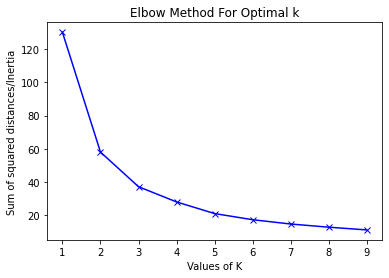

In [108]:
#finding optimal number of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [97]:
km = KMeans(3)  #making clusters of 3
km.fit(x)

KMeans(n_clusters=3)

In [98]:
km.cluster_centers_    #getting centroids

array([[5.006     , 3.418     ],
       [5.77358491, 2.69245283],
       [6.81276596, 3.07446809]])

In [99]:
km.labels_     #getting label values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [100]:
data['cluster']=km.labels_    #adding cluster labels to dataframe
labels=km.labels_
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,1,0
1,2,4.9,3.0,1.4,0.2,1,0
2,3,4.7,3.2,1.3,0.2,1,0
3,4,4.6,3.1,1.5,0.2,1,0
4,5,5.0,3.6,1.4,0.2,1,0


In [101]:
identified_clusters = kmeans.fit_predict(x)    #alternative way to get identidied clusters
identified_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

**Visualising result**

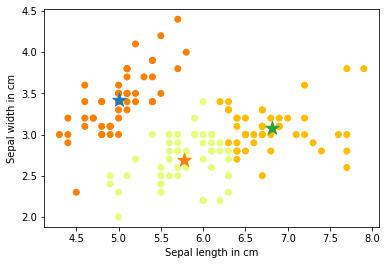

In [107]:
data_with_clusters = data.copy()      
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['SepalLengthCm'],data_with_clusters['SepalWidthCm'],c=data_with_clusters['Clusters'],cmap='Wistia') 
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal width in cm')
for i in km.cluster_centers_:
  plt.scatter(i[0],i[1],200,marker="*")   #for centroids